<a href="https://colab.research.google.com/github/SorenPrado/ibmec-soren/blob/main/2_trabalho_de_data_mining_e_ai_ibmec_modelospreditivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
import pickle

In [24]:
df = pd.read_excel('https://raw.githubusercontent.com/SorenPrado/ibmec-soren/main/diabete_limpo.xlsx')

In [25]:
# Retorna as dimensões do dataframe
df.shape

(549, 7)

In [26]:
# Retorna os tipos de dados de cada coluna
df.dtypes

Id                         int64
Numero_gestacoes           int64
Glicose_mg/dl              int64
Pressao_arterial_mmHg      int64
IMC_kg/m²                float64
Idade_anos_01/01/2023      int64
Diabete_0_1                int64
dtype: object

<AxesSubplot:xlabel='Diabete_0_1', ylabel='count'>

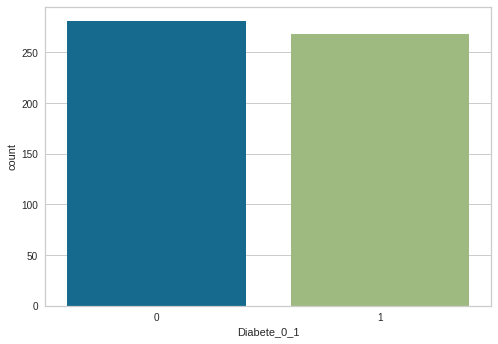

In [27]:
df.drop('Id', axis=1, inplace=True)
sns.countplot(x = df['Diabete_0_1'])

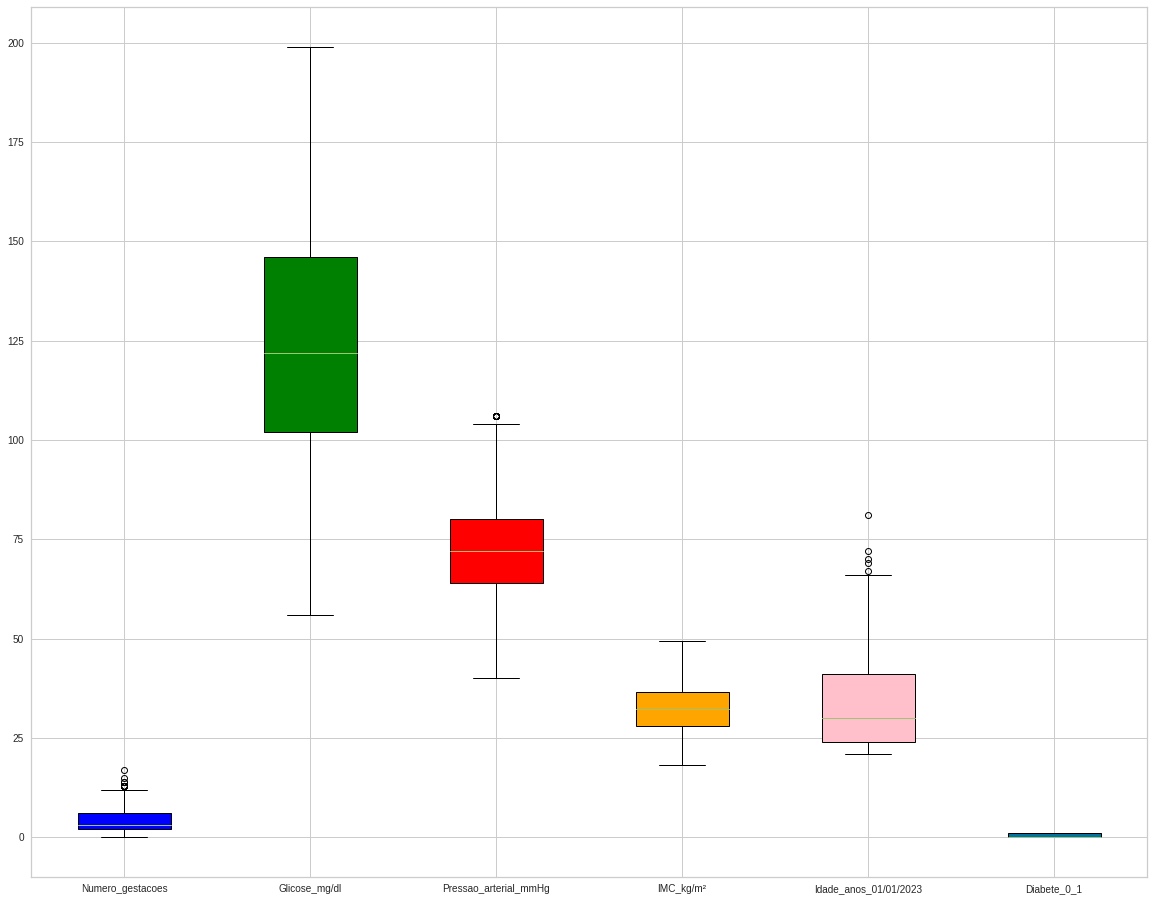

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))
bp = ax.boxplot(df.values, patch_artist=True, labels=df.columns)
cores = ['blue', 'green', 'red', 'orange', 'pink']
for patch, cor in zip(bp['boxes'], cores):
    patch.set_facecolor(cor)
plt.show()

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['Numero_gestacoes', 'Glicose_mg/dl', 'Pressao_arterial_mmHg', 'IMC_kg/m²', 'Idade_anos_01/01/2023' ], color = 'Diabete_0_1', width=1200, height=900)
grafico.show()

In [ ]:
#Verificando a correlação enrtre as variáveis
correlacao = df.corr()

In [ ]:
X_df = df.iloc[:, 0:5].values
Y_df = df.iloc[:, 5].values

In [28]:
scaler = StandardScaler()
X_df = scaler.fit_transform(X_df)

In [29]:
X_df_treinamento, X_df_teste, Y_df_treinamento, Y_df_teste = train_test_split(X_df, Y_df, test_size = 0.25, random_state = 73)

### Aplicando o algorítmo de ML Naïve Bayes

In [30]:
modelo = GaussianNB().fit(X_df_treinamento, Y_df_treinamento)

## Variáveis que mais contribuíram com o resultado

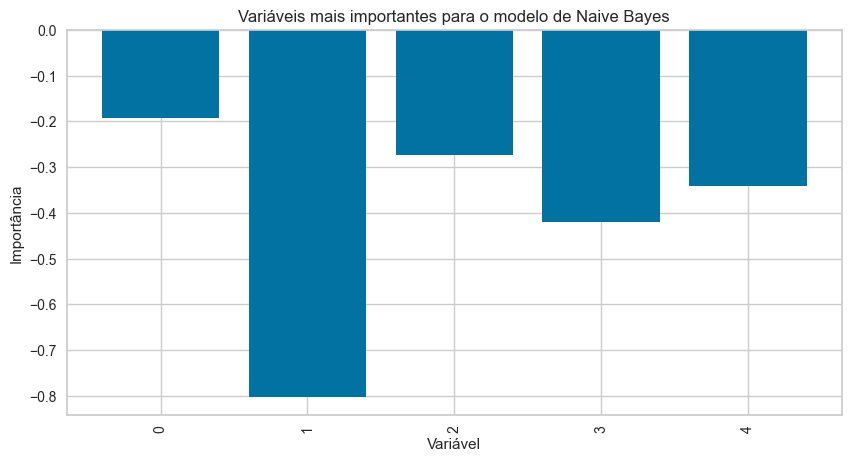

In [ ]:
# Treina o modelo Naive Bayes Gaussiano
modelo = GaussianNB().fit(X_df_treinamento, Y_df_treinamento)

# Obtém o desvio padrão de cada variável do conjunto de treinamento
std_dev = modelo.var_

# Calcula as probabilidades condicionais para cada variável
probs = modelo.theta_ / std_dev

# Ordena as probabilidades para obter as variáveis mais importantes
importancia = pd.Series(probs[0]).sort_values(ascending=False)

# Gera um gráfico de barras das variáveis mais importantes
plt.figure(figsize=(10, 5))
plt.bar(importancia.index, importancia.values)
plt.xticks(rotation=90)
plt.ylabel('Importância')
plt.xlabel('Variável')
plt.title('Variáveis mais importantes para o modelo de Naive Bayes')
plt.show()


### Gerando previsões utilizando o modelo treinado, aplicando o dataset de variáveis preditoras de teste

In [31]:
previsoes = modelo.predict(X_df_teste)

In [34]:
score = accuracy_score(Y_df_teste, previsoes, normalize=True)
if score  == 1:
    print('score de {}'.format(score))
else:
    print('score do modelo {} de melhor performance'.format(score))

score do modelo 0.7463768115942029 de melhor performance


Label:  0.7463768115942029
VP: 50
VN: 53
FP: 21
FN: 14


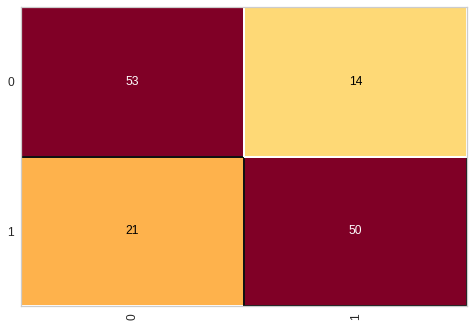

In [36]:
cm = ConfusionMatrix(modelo)
cm.fit(X_df_treinamento, Y_df_treinamento)
cm.score(X_df_teste, Y_df_teste)
print("Label: ", score)

vn = cm.confusion_matrix_[0][0]
vp = cm.confusion_matrix_[1][1]
fp = cm.confusion_matrix_[1][0]
fn = cm.confusion_matrix_[0][1]
print('VP:', vp)
print('VN:', vn)
print('FP:', fp)
print('FN:', fn)

In [38]:

with open('modelo_treinado_NB.pkl', mode = 'wb') as arquivo:
  pickle.dump(modelo, arquivo)

In [39]:

with open('modelo_treinado_NB.pkl', 'rb') as arquivo:
  modelo = pickle.load(arquivo)

In [40]:
# Define as variáveis preditoras com valores aleatórios
numero_gestacoes = np.random.randint(0, 20)
glicose = np.random.randint(50, 200)
pressao_arterial = np.random.randint(60, 140)
imc = np.random.uniform(15, 50)
idade = np.random.randint(20, 80)

# Cria um dataframe com os valores de entrada
valores = pd.DataFrame([{
    'Numero_gestacoes': numero_gestacoes,
    'Glicose_mg/dl': glicose,
    'Pressao_arterial_mmHg': pressao_arterial,
    'IMC_kg/m²': imc,
    'Idade_anos_01/01/2023': idade
}])

In [41]:

valores_norm = scaler.transform(valores.values)

# Realiza a predição com o modelo treinado
resultado = modelo.predict(valores_norm)

# Exibe o resultado da predição
if resultado[0] == 1:
    resultado_texto = 'O paciente possui alta probabilidade de ter diabetes'
else:
    resultado_texto = 'O paciente possui baixa probabilidade de ter diabetes'
print("Resultado da predição:", resultado_texto)

Resultado da predição: O paciente possui alta probabilidade de ter diabetes


In [43]:
classificador = RandomForestClassifier(n_estimators=150, max_depth=6)
classificador.fit(X_df_treinamento, Y_df_treinamento)
previsoes = classificador.predict(X_df_teste)
score = accuracy_score(Y_df_teste, previsoes)
if score  == 1:
    print('score {}'.format(score))
else:
    print('score do modelo {} de melhor performance'.format(score))

score do modelo 0.8188405797101449 de melhor performance


Verdadeiros negativo (VN): 56
Falsos negativo (FN): 11
Falsos positivos (FP): 14
Verdadeiro positivos(VP): 57


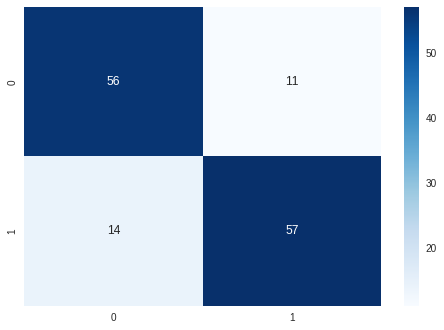

In [44]:
matriz = confusion_matrix(Y_df_teste, previsoes)
sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g')
print('Verdadeiros negativo (VN): {}\nFalsos negativo (FN): {}\nFalsos positivos (FP): {}\nVerdadeiro positivos(VP): {}'.format(matriz[0,0], matriz[0,1], matriz[1,0], matriz[1,1]))

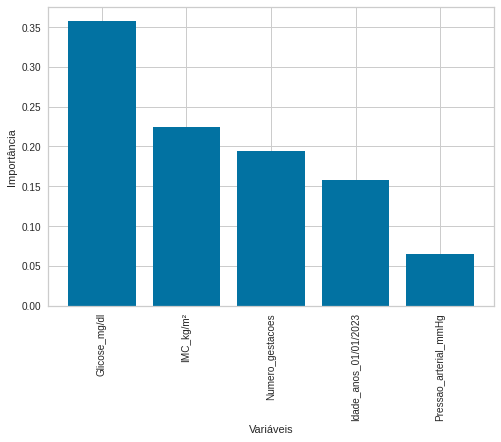

In [45]:
importancias = classificador.feature_importances_

# Obtém os índices ordenados em ordem decrescente
indices_ordenados = importancias.argsort()[::-1]

# Obtém as importâncias ordenadas em ordem decrescente
importancias_ordenadas = importancias[indices_ordenados]

# Cria um gráfico de barras com as importâncias ordenadas
plt.bar(range(len(importancias)), importancias_ordenadas)

# Define o rótulo do eixo X como as variáveis, na ordem em que aparecem nas colunas ordenadas
colunas_ordenadas = df.iloc[:, :-1].columns[indices_ordenados].tolist()
plt.xticks(range(len(importancias)), colunas_ordenadas, rotation=90)

plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()

In [46]:
# Define as variáveis preditoras
numero_gestacoes = np.random.randint(0, 20)
glicose = np.random.randint(50, 200)
pressao_arterial = np.random.randint(60, 140)
imc = np.random.uniform(15, 50)
idade = np.random.randint(20, 80)
# Cria um dataframe com os valores de entrada
valores = pd.DataFrame([{
    'Numero_gestacoes': numero_gestacoes,
    'Glicose_mg/dl': glicose,
    'Pressao_arterial_mmHg': pressao_arterial,
    'IMC_kg/m²': imc,
    'Idade_anos_01/01/2023': idade
}])
# Normaliza as variáveis preditoras utilizando o scaler carregado
valores_norm = scaler.transform(valores.values)

# Realiza a predição com o modelo treinado
resultado = classificador.predict(valores_norm)

# Exibe o resultado da predição
if resultado[0] == 1:
    resultado_texto = 'O paciente possui alta probabilidade de ter diabetes'
else:
    resultado_texto = 'O paciente possui baixa probabilidade de ter diabetes'
print("Resultado da predição:", resultado_texto)

Resultado da predição: O paciente possui alta probabilidade de ter diabetes


In [47]:
# Divisão da base de dados utilizando os dados brutos
X_df_bruto = df.iloc[:, 0:5].values
Y_df_bruto = df.iloc[:, 5].values

# Divisão dos datasets de variáveis preditoras e dependentes em treinamento e teste
X_df_bruto_treinamento, X_df_bruto_teste, Y_df_bruto_treinamento, Y_df_bruto_teste = train_test_split(X_df_bruto, Y_df_bruto, test_size = 0.25, random_state = 73)

# Aplicando o algorítmo de ML Random Forest
classificador_novo = RandomForestClassifier(n_estimators=150, max_depth=6 )
classificador_novo.fit(X_df_bruto_treinamento, Y_df_bruto_treinamento)

# Aplicando a base de teste e calculando o score
previsoes_nova = classificador_novo.predict(X_df_bruto_teste)
score_novo = accuracy_score(Y_df_bruto_teste, previsoes_nova)
if score_novo  == 1:
    print('O modelo alcançou a melhor performance possível, com um score de {}'.format(score_novo))
else:
      print('O score do modelo treinado foi de {}, em uma escala de 0 a 1 onde 1 representa a melhor performance possível'.format(score_novo))

O score do modelo treinado foi de 0.8115942028985508, em uma escala de 0 a 1 onde 1 representa a melhor performance possível


Verdadeiros negativo (VN): 56
Falsos negativo (FN): 11
Falsos positivos (FP): 14
Verdadeiro positivos(VP): 57


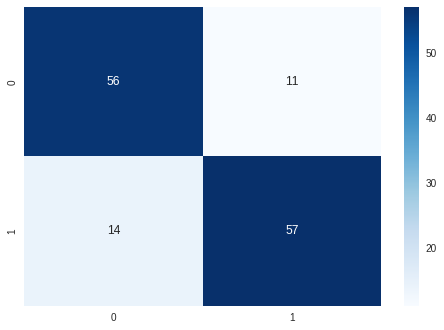

In [48]:
matriz_nova = confusion_matrix(Y_df_bruto_teste, previsoes_nova)
sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g')
print('Verdadeiros negativo (VN): {}\nFalsos negativo (FN): {}\nFalsos positivos (FP): {}\nVerdadeiro positivos(VP): {}'.format(matriz[0,0], matriz[0,1], matriz[1,0], matriz[1,1]))

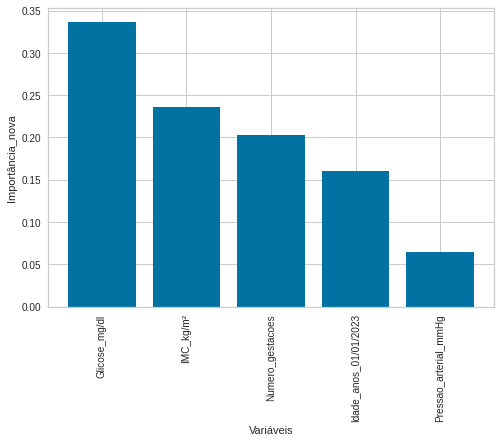

In [49]:
importancias_nova = classificador_novo.feature_importances_

# Obtém os índices ordenados em ordem decrescente
indices_ordenados = importancias_nova.argsort()[::-1]

# Obtém as importâncias ordenadas em ordem decrescente
importancias_ordenadas = importancias_nova[indices_ordenados]

# Cria um gráfico de barras com as importâncias ordenadas
plt.bar(range(len(importancias_nova)), importancias_ordenadas)

# Define o rótulo do eixo X como as variáveis, na ordem em que aparecem nas colunas ordenadas
colunas_ordenadas = df.iloc[:, :-1].columns[indices_ordenados].tolist()
plt.xticks(range(len(importancias_nova)), colunas_ordenadas, rotation=90)

plt.xlabel("Variáveis")
plt.ylabel("Importância_nova")
plt.show()

In [50]:
# Define as variáveis preditoras
numero_gestacoes = np.random.randint(0, 14)
glicose = np.random.randint(50, 200)
pressao_arterial = np.random.randint(50, 150)
imc = np.random.uniform(15, 50)
idade = np.random.randint(18, 100)

# Cria um dataframe com os valores de entrada
valores_bruto = pd.DataFrame([{
    'Numero_gestacoes': numero_gestacoes,
    'Glicose_mg/dl': glicose,
    'Pressao_arterial_mmHg': pressao_arterial,
    'IMC_kg/m²': imc,
    'Idade_anos_01/01/2023': idade
}])

# Realiza a predição com o modelo treinado
resultado_bruto = classificador_novo.predict(valores_bruto.values)

# Exibe o resultado da predição
if resultado_bruto[0] == 1:
    resultado_texto = 'O paciente possui alta probabilidade de ter diabetes'
else:
    resultado_texto = 'O paciente possui baixa probabilidade de ter diabetes'
print("Resultado da predição:", resultado_texto)

Resultado da predição: O paciente possui baixa probabilidade de ter diabetes


In [52]:
from sklearn.model_selection import GridSearchCV

# Define os valores possíveis para cada hiperparâmetro a ser testado
parametros = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6],
}

# Cria o objeto do classificador RandomForestClassifier
rf = RandomForestClassifier()

# Cria o objeto do Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=parametros, cv=5)

# Treina o modelo com todas as combinações de hiperparâmetros possíveis
grid_search.fit(X_df_bruto_treinamento, Y_df_bruto_treinamento)

# Exibe os resultados do melhor modelo encontrado
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor score de acurácia:", grid_search.best_score_)

#Imprime os hiperparâmetros default do RandomForestClassifier
params = rf.get_params()
for key, value in params.items():
    print(key, ": ", value)

Melhores hiperparâmetros: {'max_depth': 6, 'n_estimators': 150}
Melhor score de acurácia: 0.8004407875404056
bootstrap :  True
ccp_alpha :  0.0
class_weight :  None
criterion :  gini
max_depth :  None
max_features :  sqrt
max_leaf_nodes :  None
max_samples :  None
min_impurity_decrease :  0.0
min_samples_leaf :  1
min_samples_split :  2
min_weight_fraction_leaf :  0.0
n_estimators :  100
n_jobs :  None
oob_score :  False
random_state :  None
verbose :  0
warm_start :  False
